<a href="https://colab.research.google.com/github/chenchenga07/Python-Data-Analysis/blob/master/Instagram%20API/Post_Caption_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA (Exploratory Data Analysis)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
ig = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/All_Brands_Posts.csv', header=0, index_col=0)

ig.head()
#ig[:]

,media_type,caption,comments_count,like_count,timestamp,id,brand,total_followers,total_media
0,VIDEO,Options are everything. Our new #5050VOTE boot...,7,562,2020-08-22T18:03:49+0000,17939023192381719,stuartweitzman,1417237,4121
1,VIDEO,We elected to design this limited-edition #505...,3,263,2020-08-22T13:29:32+0000,17947298341370810,stuartweitzman,1417237,4121
2,VIDEO,Your first look is here: Cast your eyes on the...,62,1313,2020-08-21T20:02:53+0000,18021788317287246,stuartweitzman,1417237,4121
3,VIDEO,Breaking news: We’re dropping our new limited-...,12,450,2020-08-21T18:16:32+0000,17878359196753326,stuartweitzman,1417237,4121
4,VIDEO,It’s limited-edition. It’s innovative. It’s im...,9,491,2020-08-21T15:01:19+0000,17863493075038184,stuartweitzman,1417237,4121


In [4]:
ig.shape

(3900, 9)

In [5]:
ig.empty

False

In [6]:
ig['caption'].sample(n = 20)

386     The stripes motif, characteristic of the Flore...
251     Be Mine: The #ROSELINA peep-toe in black satin...
2414    Starting the day with a trusty companion and t...
1883    In #SergioRossi we want to look positively tow...
274     Buckle down on your 2020 goals in our new #BEN...
533     Believe in the power of Love! Take a closer lo...
1902    In times like these any word could result triv...
46      Our signature #ANNY pump gets a statement-maki...
418     Reach new heights wearing our Cozumel Plateau ...
3721    Jumping into the weekend like 🤸🏻‍♀️✌🏻💦 young_e...
228     The voguemagazine x #StuartWeitzman Edit spotl...
627     Flare up our day with the Gianvito pump in eye...
2969    Tip the style balance in your favor with #Chri...
3127    The Sustainable Thinking showcase does not see...
3729                 Cutie lareina.szr and her MARA bag 🕊
1685    Enhancing femininity with the new #Tods heels....
1479    Regroup for a second— in Icon.  Photo: lolario...
3015    A prev

In [7]:
# check whether has Null captions
sum (ig['caption'].isna())

2

In [8]:
#fill Null captions with '', so that len() can work
values = {'caption': ''}
ig.fillna(value=values, inplace = True)

sum (ig['caption'].isna())

0

In [9]:
#get text length
ig['length'] = ig['caption'].apply(len) 

ig.head()

,media_type,caption,comments_count,like_count,timestamp,id,brand,total_followers,total_media,length
0,VIDEO,Options are everything. Our new #5050VOTE boot...,7,562,2020-08-22T18:03:49+0000,17939023192381719,stuartweitzman,1417237,4121,299
1,VIDEO,We elected to design this limited-edition #505...,3,263,2020-08-22T13:29:32+0000,17947298341370810,stuartweitzman,1417237,4121,301
2,VIDEO,Your first look is here: Cast your eyes on the...,62,1313,2020-08-21T20:02:53+0000,18021788317287246,stuartweitzman,1417237,4121,275
3,VIDEO,Breaking news: We’re dropping our new limited-...,12,450,2020-08-21T18:16:32+0000,17878359196753326,stuartweitzman,1417237,4121,187
4,VIDEO,It’s limited-edition. It’s innovative. It’s im...,9,491,2020-08-21T15:01:19+0000,17863493075038184,stuartweitzman,1417237,4121,151


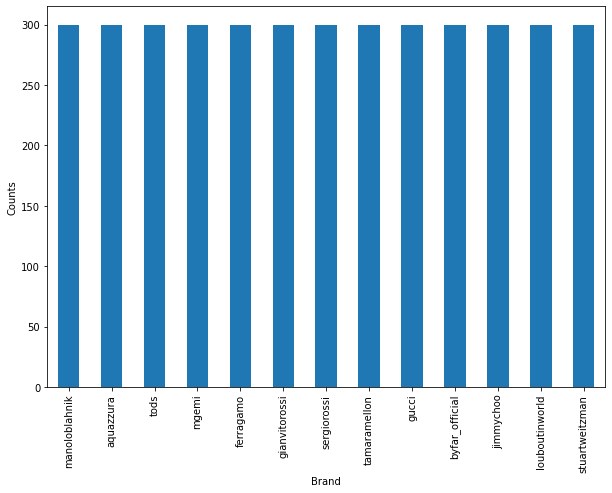

In [10]:
#visualization of brand and post count in the dataset
import matplotlib.pyplot as cplt

cplt.figure(figsize=(10,7))

cplt.xlabel('Brand')
cplt.ylabel('Counts')

ig.brand.value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


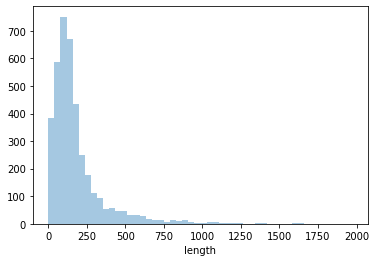

In [11]:
import seaborn as sns

sns.distplot(ig['length'], kde=False)

In [12]:
ig_sub = ig[['media_type','comments_count','like_count','timestamp','brand','length']]
ig_sub.head()

,media_type,comments_count,like_count,timestamp,brand,length
0,VIDEO,7,562,2020-08-22T18:03:49+0000,stuartweitzman,299
1,VIDEO,3,263,2020-08-22T13:29:32+0000,stuartweitzman,301
2,VIDEO,62,1313,2020-08-21T20:02:53+0000,stuartweitzman,275
3,VIDEO,12,450,2020-08-21T18:16:32+0000,stuartweitzman,187
4,VIDEO,9,491,2020-08-21T15:01:19+0000,stuartweitzman,151


In [ ]:
#another way to subset
#ig_sub = ig.drop(['caption','id','total_followers', 'total_media'], axis=1, inplace = False)
#ig_sub.head()

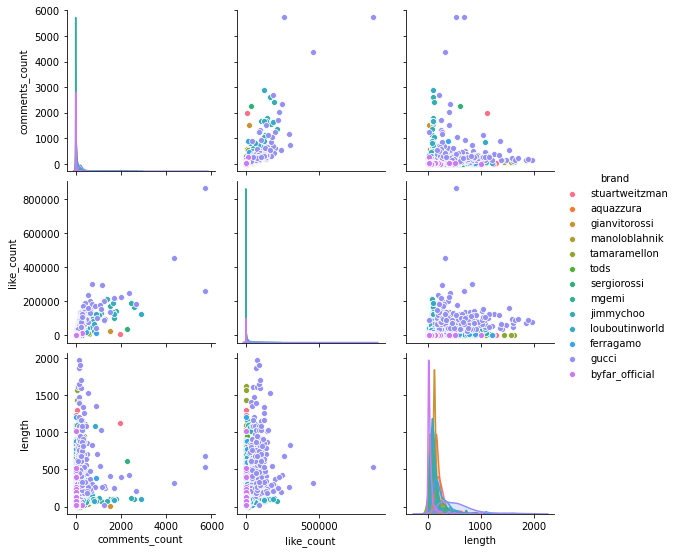

In [13]:
#correlation between post legth & like count & comment count
sns.pairplot(ig_sub, hue='brand',palette= sns.color_palette('husl', n_colors=15))

#more detailed exploratory analysis in Tableau

##Pre-Processing

###Step 1: Contraction Mapping / Expanding Contractions

In [14]:
!pip install contractions
import contractions

In [15]:
ig_text = ig[['brand','caption']]
ig_text.sample(frac=0.0025, random_state = 12)

,brand,caption
2519,jimmychoo,The THYRA black suede and knotted crystal sand...
1889,sergiorossi,Can’t wait to write a new love story together ...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...
3558,gucci,Animals and a childlike imagination are recurr...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...
3375,gucci,Outside in the garden with alessandro_michele ...
3393,gucci,Accidentally matching furniture and objects in...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...
1330,tamaramellon,"If you’re like us, the answer to “how are you ..."


In [16]:
#remove contractions
ig_text['no_contract'] = ig_text['caption'].apply(lambda x: [contractions.fix(word) for word in x.split()]) 

ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how..."


In [17]:
#convert the lists under the "no_contract" column back into strings
ig_text['no_contract_str'] = [' '.join(map(str, x)) for x in ig_text['no_contract']] 

ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract,no_contract_str
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you..."


###Step 2: Tokenization

In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
ig_text['tokenized'] = ig_text['no_contract_str'].apply(word_tokenize) #punctuations will also be tokenized 
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,caption,no_contract,no_contract_str,tokenized
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you...","[If, you, are, like, us, ,, the, answer, to, “..."


###Step 3: Noise Cleaning - lowercasing, special characters

In [20]:
ig_text['lower'] = ig_text['tokenized'].apply(lambda x: [word.lower() for word in x])
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,caption,no_contract,no_contract_str,tokenized,lower
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst..."
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor..."
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,..."
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,..."
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ..."
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate..."
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi..."
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec..."
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec..."
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you are, like, us,, the, answer, to, “how...","If you are like us, the answer to “how are you...","[If, you, are, like, us, ,, the, answer, to, “...","[if, you, are, like, us, ,, the, answer, to, “..."


In [21]:
import string
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
punc2 = punc + '’“”—‘...' #add extra puctuations appears in the text found in later steps
punc2

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’“”—‘...'

In [28]:
#remove punctuations
ig_text['no_punc'] = ig_text['lower'].apply(lambda x: [word for word in x if word not in punc2])
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract,no_contract_str,tokenized,lower,no_punc,stopwords_removed,caption_cleaned
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[thyra, black, suede, knotted, crystal, sandal...",thyra black suede knotted crystal sandals met ...
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[wait, write, new, love, story, together, soon...",wait write new love story together soon pic ni...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,...","[the, sergiorossiman, is, officially, back, di...","[sergiorossiman, officially, back, discover, n...",sergiorossiman officially back discover new se...
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, childlike, imagination, recurring, m...",animals childlike imagination recurring motifs...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[positano, sandal, soft, gold, metallic, leath...",positano sandal soft gold metallic leather per...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, celebrate, ne...",mr fabrizio.oriani joins us celebrate new chap...
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, garden, alessandro_michele, palazzo,...",outside garden alessandro_michele palazzo sacc...
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, objects, h...",accidentally matching furniture objects homes ...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, perfect, fragranc...",celebrate valentines day perfect fragrance inc...
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you a

###Step 4: ‘Stop Words’ Identification

In [29]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#stop words sample
stopwords.words('english')[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [31]:
ig_text['stopwords_removed'] = ig_text['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,caption,no_contract,no_contract_str,tokenized,lower,no_punc,stopwords_removed,caption_cleaned
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[thyra, black, suede, knotted, crystal, sandal...",thyra black suede knotted crystal sandals met ...
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[wait, write, new, love, story, together, soon...",wait write new love story together soon pic ni...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,...","[the, sergiorossiman, is, officially, back, di...","[sergiorossiman, officially, back, discover, n...",sergiorossiman officially back discover new se...
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, childlike, imagination, recurring, m...",animals childlike imagination recurring motifs...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[positano, sandal, soft, gold, metallic, leath...",positano sandal soft gold metallic leather per...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, celebrate, ne...",mr fabrizio.oriani joins us celebrate new chap...
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, garden, alessandro_michele, palazzo,...",outside garden alessandro_michele palazzo sacc...
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, objects, h...",accidentally matching furniture objects homes ...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, perfect, fragranc...",celebrate valentines day perfect fragrance inc...
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you a

In [32]:
#convert the lists back into strings
ig_text['caption_cleaned'] = [' '.join(map(str, x)) for x in ig_text['stopwords_removed']] 

ig_text.sample(frac=0.0025, random_state = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,brand,caption,no_contract,no_contract_str,tokenized,lower,no_punc,stopwords_removed,caption_cleaned
2519,jimmychoo,The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...",The THYRA black suede and knotted crystal sand...,"[The, THYRA, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[the, thyra, black, suede, and, knotted, cryst...","[thyra, black, suede, knotted, crystal, sandal...",thyra black suede knotted crystal sandals met ...
1889,sergiorossi,Can’t wait to write a new love story together ...,"[can not, wait, to, write, a, new, love, story...",can not wait to write a new love story togethe...,"[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[can, not, wait, to, write, a, new, love, stor...","[wait, write, new, love, story, together, soon...",wait write new love story together soon pic ni...
1980,sergiorossi,The #SergioRossiMan is officially back! Discov...,"[The, #SergioRossiMan, is, officially, back!, ...",The #SergioRossiMan is officially back! Discov...,"[The, #, SergioRossiMan, is, officially, back,...","[the, #, sergiorossiman, is, officially, back,...","[the, sergiorossiman, is, officially, back, di...","[sergiorossiman, officially, back, discover, n...",sergiorossiman officially back discover new se...
3558,gucci,Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...",Animals and a childlike imagination are recurr...,"[Animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, and, a, childlike, imagination, are,...","[animals, childlike, imagination, recurring, m...",animals childlike imagination recurring motifs...
326,aquazzura,Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...",Our Very Positano Sandal in soft gold metallic...,"[Our, Very, Positano, Sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[our, very, positano, sandal, in, soft, gold, ...","[positano, sandal, soft, gold, metallic, leath...",positano sandal soft gold metallic leather per...
1985,sergiorossi,Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...",Mr fabrizio.oriani joins us to celebrate this ...,"[Mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, to, celebrate...","[mr, fabrizio.oriani, joins, us, celebrate, ne...",mr fabrizio.oriani joins us celebrate new chap...
3375,gucci,Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...",Outside in the garden with alessandro_michele ...,"[Outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, in, the, garden, with, alessandro_mi...","[outside, garden, alessandro_michele, palazzo,...",outside garden alessandro_michele palazzo sacc...
3393,gucci,Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...",Accidentally matching furniture and objects in...,"[Accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, and, objec...","[accidentally, matching, furniture, objects, h...",accidentally matching furniture objects homes ...
2506,jimmychoo,Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...",Celebrate Valentines Day with the perfect frag...,"[Celebrate, Valentines, Day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, with, the, perfec...","[celebrate, valentines, day, perfect, fragranc...",celebrate valentines day perfect fragrance inc...
1330,tamaramellon,"If you’re like us, the answer to “how are you ...","[If, you a

In [33]:
text = ig_text.caption_cleaned[0] #get 1 post caption for example
text

"options everything new 5050vote boot features debut lightweight durable lift lug sole available 'vote motif either black silver get drops exclusively instagram 8.23.2020 designed support iamavoter stuartweitzman iamavoter"

In [34]:
text2 = ig.caption[0] #get the original post caption before processing
text2

"Options are everything. Our new #5050VOTE boot, which features the debut of our lightweight and durable LIFT lug sole, is available with a 'VOTE' motif in either black or silver. Get yours when it drops exclusively on Instagram 8.23.2020. Designed in support of iamavoter. #StuartWeitzman #iamavoter"

In [35]:
ig_text.to_csv('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/IG_Text_Cleaned.csv', index=True)

In [ ]:
#load in cleaned df if needed
#ig_text = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/IG_Text_Cleaned.csv', header=0, index_col=0)

#fill Null captions with '', so that len() can work
#values = {'caption_cleaned': ''}
#ig_text.fillna(value=values, inplace = True)

#sum (ig_text['caption_cleaned'].isna())

##Word Cloud

###For 1 singel post

In [36]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [37]:
#word cloud for the first post caption as example
#use wordcloud builtin algorithm
wordcloud = WordCloud(background_color='white').generate(text)

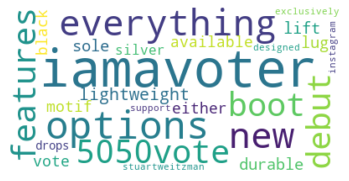

In [38]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###For all brands' posts

In [39]:
#combine all posts into 1 big text
textAll = ' '.join(t for t in ig_text.caption_cleaned) 
print ('There are {} words in the combination of all review.'.format(len(textAll)))

There are 556908 words in the combination of all review.


In [40]:
import os
import string
from os import path

#include Emoji in word cloud
normal_word = r"(?:\w[\w']+)"
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)

emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,emoji=emoji)

font_path = path.join('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/', 'symbola', 'Symbola.ttf')

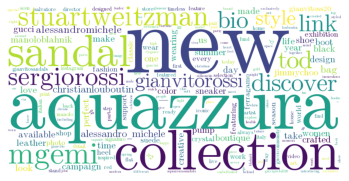

In [42]:
#approach 1: use wordcloud builtin algorithm
wordcloud = WordCloud(background_color='white',width=800, height=400, collocations = False, 
                      font_path=font_path, regexp=regexp).generate(textAll) 
                      #collocations = F: don't do bigram
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
#approach 2: pull word frequency dictionary, then use it to polt word cloud - will only use this approach in following steps

#checking word's frequency (exclude stop words)
from collections import Counter

def word_frequency_dict(text,top_n = 30):
    stop = set(stopwords.words('english')) 
    stop.add('\'s') #exclude 's
    #delete "remove stop word" part here will not affect result, because we already did it in previous steps
    
    new = text.str.split() #column of lists
    new = new.values.tolist() #list of lists
    corpus = [word for i in new for word in i  if word not in stop] #to one list of words

    counter = Counter(corpus)
    most = counter.most_common() #list of tuples(word,count) desc

    result = {}
    for word,count in most[:top_n]:
      result[word] = count
            
    return result #get dict of word:frequency to use in wordcloud plot

In [44]:
allBrand_30 = word_frequency_dict(ig_text['caption_cleaned'])
allBrand_200 = word_frequency_dict(ig_text['caption_cleaned'],200)

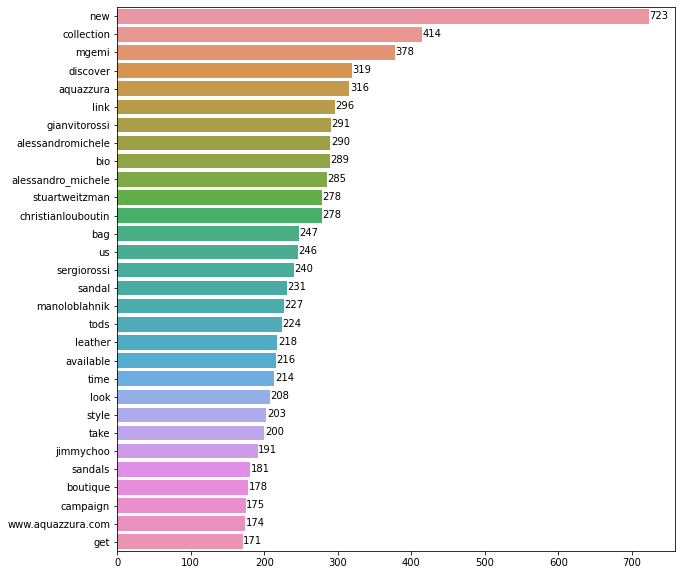

In [45]:
#plot out word's frequency (exclude stop words)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_frequency(wf):

    plt.figure(figsize=(10,10))
    plt.autoscale(True)
    splot = sns.barplot(x=list(wf.values()),y=list(wf.keys()))
    #plt.savefig('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/Export Images/allBrand_word_frequency.png')

    for p in splot.patches: #add annotations using matplotlib.axes.Axes.annotate
      splot.annotate(format(p.get_width(), '.0f'), #round to integer
                   (p.get_width(), p.get_y() + p.get_height()),  #adjust annotate position
                   ha = 'center', va = 'center', 
                   xytext = (10, 8), #the position (x, y) to place the text at
                   textcoords = 'offset points')

    
plot_word_frequency(allBrand_30)

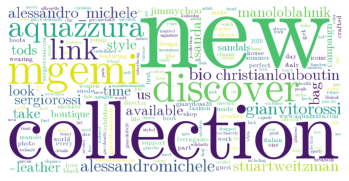

In [46]:
#use the word frequency dict created by ourselves to plot wordcloud

wordcloud2 = WordCloud(background_color='white',width=800, height=400,collocations = False,
                       font_path=font_path, regexp=regexp).generate_from_frequencies(allBrand_200) 

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [47]:
wordcloud2.to_file('/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/Export Images/allBrand_wordcloud.png')

###For all SW's posts

In [48]:
#pull post captions for stuartweitzman as example
ig_text[ig_text['brand']== 'stuartweitzman'].caption_cleaned

0      options everything new 5050vote boot features ...
1      elected design limited-edition 5050vote boot s...
2      first look cast eyes limited-edition 5050vote ...
3      breaking news dropping new limited-edition 505...
4      limited-edition innovative impactful something...
                             ...                        
295    ww ❤️ sw wonderwoman star galgadot coordinates...
296    spotted prima ballerina mistycopeland dancing ...
297    holiday mode step inside hudson yards boutique...
298    times square ready new year visit 45th street ...
299    swholiday campaign step inside part iii streng...
Name: caption_cleaned, Length: 300, dtype: object

In [49]:
sw_30 = word_frequency_dict(ig_text[ig_text['brand']== 'stuartweitzman'].caption_cleaned)

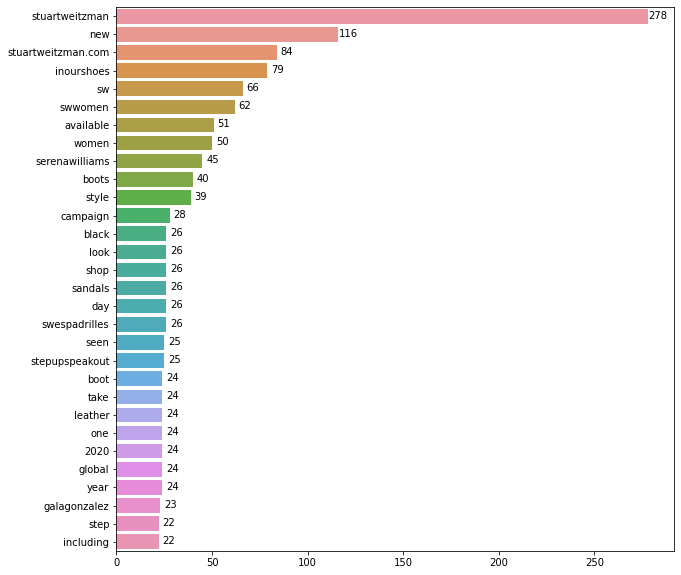

In [50]:
plot_word_frequency(sw_30)

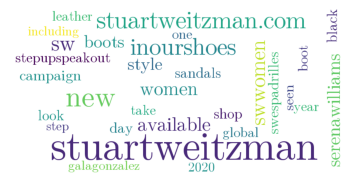

In [51]:
wordcloud3 = WordCloud(background_color='white',width=800, height=400, collocations = False,
                       font_path=font_path, regexp=regexp).generate_from_frequencies(sw_30)
                       
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

###For each brands' posts

In [53]:
allb = ig_text.brand.unique()
allb

array(['stuartweitzman', 'aquazzura', 'gianvitorossi', 'manoloblahnik',
       'tamaramellon', 'tods', 'sergiorossi', 'mgemi', 'jimmychoo',
       'louboutinworld', 'ferragamo', 'gucci', 'byfar_official'],
      dtype=object)

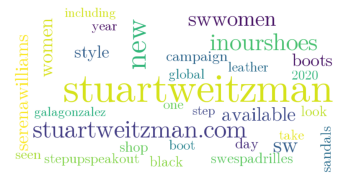

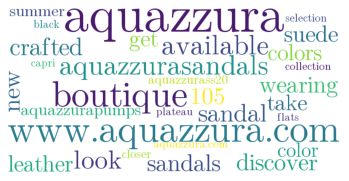

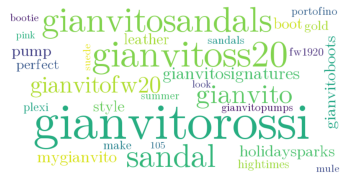

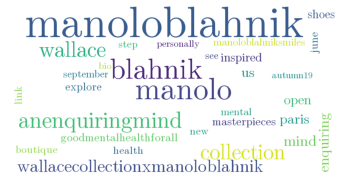

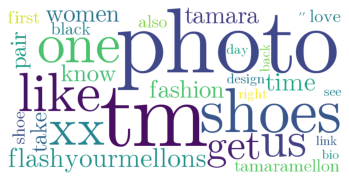

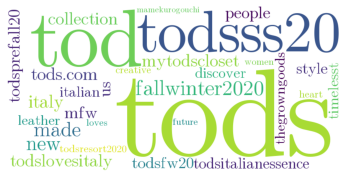

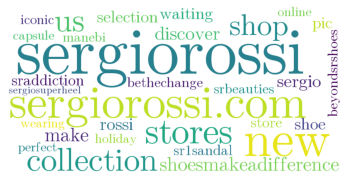

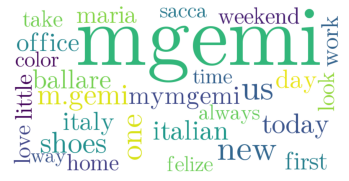

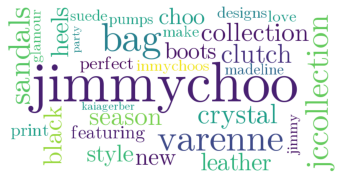

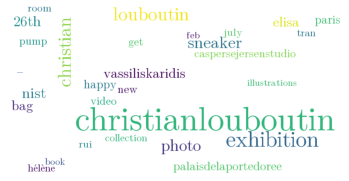

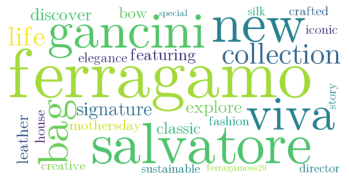

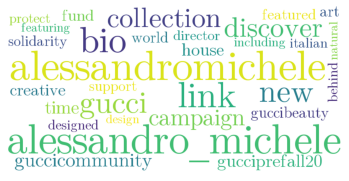

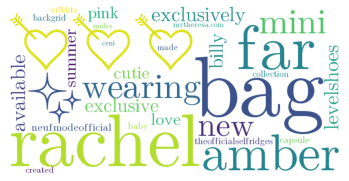

In [55]:
for b in allb:
  result = word_frequency_dict(ig_text[ig_text['brand']== b].caption_cleaned)
  #plot_word_frequency(result)

  wordcloud = WordCloud(background_color='white',width=800, height=400, collocations = False,
                        font_path=font_path, regexp=regexp).generate_from_frequencies(result)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  
  wordcloud.to_file(f'/content/drive/My Drive/Colab Notebooks/Instagram Data Analysis/Export Images/{b}_wordcloud.png')